<a href="https://colab.research.google.com/github/nibinkjoseph/Stroke-Prediction-ML/blob/main/Stroke_Prediction_Nibin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [294]:
""" id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient"""

' id: unique identifier\n2) gender: "Male", "Female" or "Other"\n3) age: age of the patient\n4) hypertension: 0 if the patient doesn\'t have hypertension, 1 if the patient has hypertension\n5) heart_disease: 0 if the patient doesn\'t have any heart diseases, 1 if the patient has a heart disease\n6) ever_married: "No" or "Yes"\n7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"\n8) Residence_type: "Rural" or "Urban"\n9) avg_glucose_level: average glucose level in blood\n10) bmi: body mass index\n11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*\n12) stroke: 1 if the patient had a stroke or 0 if not\n*Note: "Unknown" in smoking_status means that the information is unavailable for this patient'

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter("ignore")

In [296]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [297]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [298]:
#Code to find numeric data
numeric_data = df.select_dtypes(include = np.number)
numeric_col = numeric_data.columns
numeric_data.head(1)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1


In [299]:
#code to find categorical data
categorical_data = df.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked


In [300]:
#check how many unique categories each column has
for col in df.columns:
  print(col, ':', len(df[col].unique()), 'categories')

id : 5110 categories
gender : 3 categories
age : 104 categories
hypertension : 2 categories
heart_disease : 2 categories
ever_married : 2 categories
work_type : 5 categories
Residence_type : 2 categories
avg_glucose_level : 3979 categories
bmi : 419 categories
smoking_status : 4 categories
stroke : 2 categories


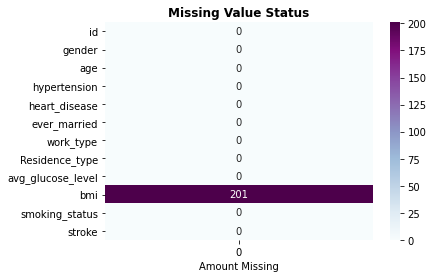

In [301]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap="BuPu")
ax.set_xlabel('Amount Missing')
plt.show()

201 missing rows in bmi feature

In [302]:
#Just for learning purpose. Actually not needed.

bmi_percent_null = (df['bmi'].isna().sum() / df.shape[0]) * 100
bmi_percent_null

3.9334637964774952

In [303]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [304]:
df.shape

(5110, 12)

In [305]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [307]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [308]:
df['age'].min()  

0.08

Doubt: Should we consider this age?

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

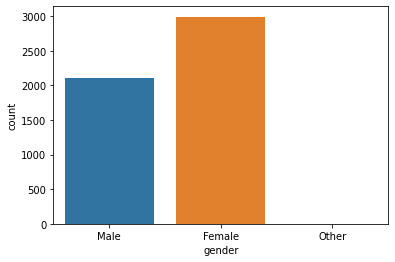

In [309]:
sns.countplot(df['gender'])
df['gender'].value_counts()

In [310]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

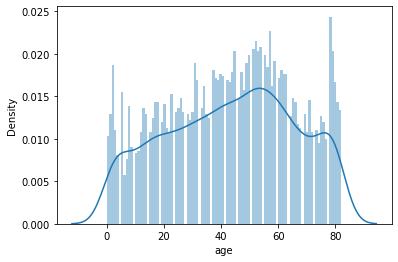

In [311]:
sns.distplot(df['age'], bins=100);
df['age'].value_counts()


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

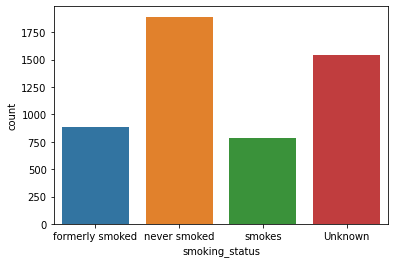

In [312]:
sns.countplot(df['smoking_status']);
df['smoking_status'].value_counts()

People who never smoked holds the maximum count

Yes    3353
No     1757
Name: ever_married, dtype: int64

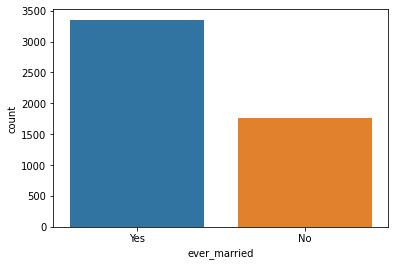

In [313]:
sns.countplot(df['ever_married']);
df['ever_married'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

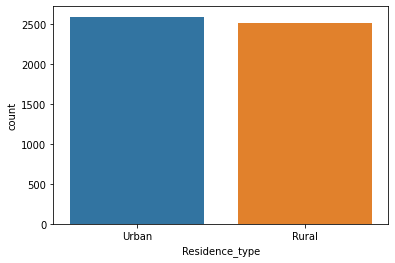

In [314]:
sns.countplot(df['Residence_type']);
df['Residence_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

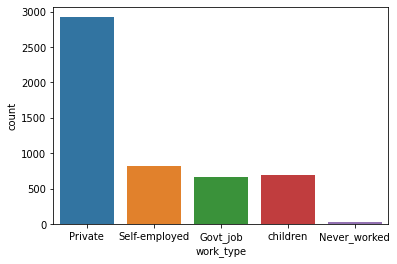

In [315]:
sns.countplot(df['work_type']);
df['work_type'].value_counts()

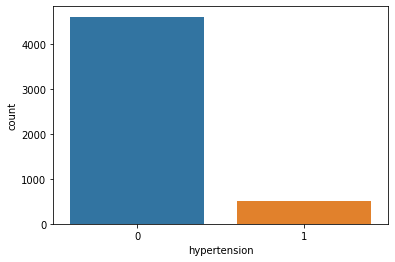

In [316]:
sns.countplot(df['hypertension']);


###Outlier detection

In [317]:

#For bmi

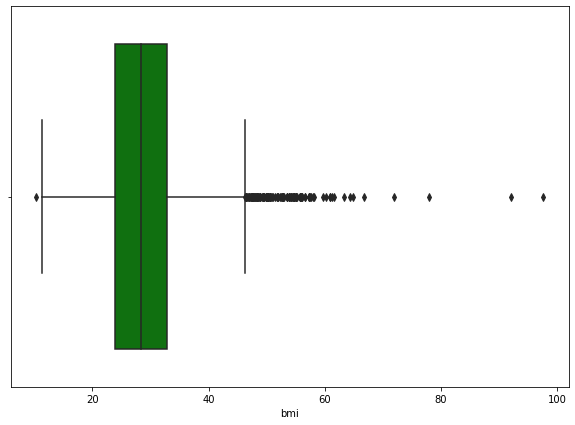

In [318]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

In [319]:
def outliers(df, variable, distance):
     IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
     lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
     upper_boundary = df[variable].quantile(0.75) + (IQR * distance) 
        
     return upper_boundary, lower_boundary


In [320]:
upper_limit, lower_limit = outliers(df, "bmi", 1.5)
upper_limit, lower_limit

(46.29999999999999, 10.300000000000006)

In [321]:
outliers_bmi=df.loc[df['bmi']>50]
outliers_bmi['bmi'].shape

(79,)

In [322]:
#so bmi with outlier
outliers_bmi['stroke'].value_counts()


0    78
1     1
Name: stroke, dtype: int64

In [323]:
#Applying lambda function to fill bmi to 50 when bmi given is greater than 50 else same.




df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)

# null values in BMI (replaced with mean) 
df["bmi"] = df["bmi"].fillna(df['bmi'].mean())


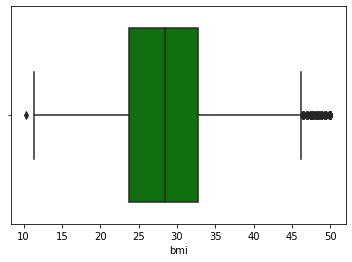

In [324]:
sns.boxplot(data=df,x=df["bmi"],color='green');

###According to the National Institutes of Health (NIH): A BMI of less than 18.5 means that a person is underweight. A BMI of between 18.5 and 24.9 is ideal. A BMI of between 25 and 29.9 is overweight.

0    4861
1     249
Name: stroke, dtype: int64

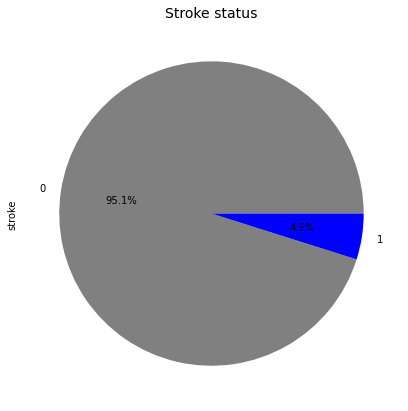

In [325]:
plt.figure(figsize=(7,7))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['grey', 'b'])
plt.title("Stroke status", fontdict={'fontsize': 14})

df["stroke"].value_counts()

Only 4.9% of people had stroke

0    4834
1     276
Name: heart_disease, dtype: int64

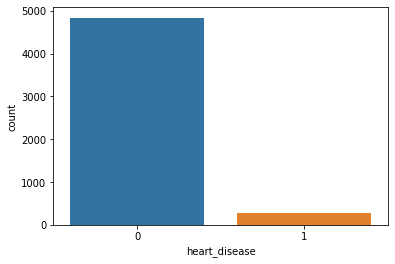

In [326]:
sns.countplot(df['heart_disease']);
df['heart_disease'].value_counts()

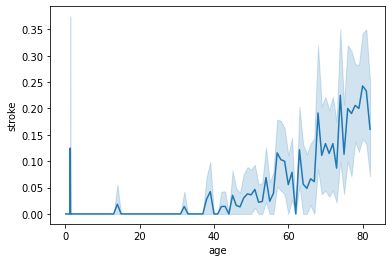

In [327]:
sns.lineplot(x='age', y='stroke', data=df)

People between the age of 60 and 80 has the high chance of getting stroke

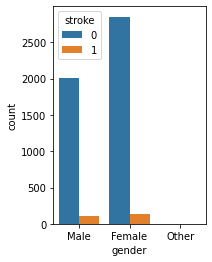

In [328]:
plt.subplot(1,2,2)
sns.countplot(df['gender'], hue= df['stroke'])

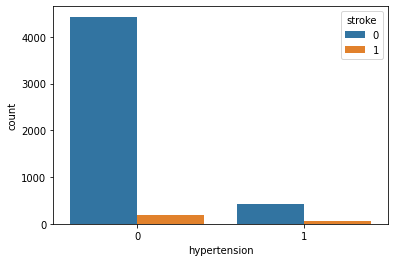

In [329]:

sns.countplot(df['hypertension'], hue= df['stroke'])

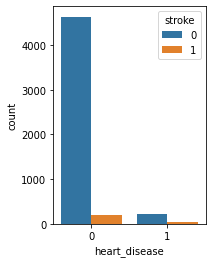

In [330]:
plt.subplot(1,2,2)
sns.countplot(df['heart_disease'], hue= df['stroke'])

People with no heart disease has very high chance of not receiving a stroke.

Yes    3353
No     1757
Name: ever_married, dtype: int64

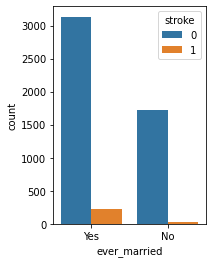

In [331]:
plt.subplot(1,2,2)
sns.countplot(df['ever_married'], hue= df['stroke'])

df['ever_married'].value_counts()

Unmarried people has less chance of getting stroke 

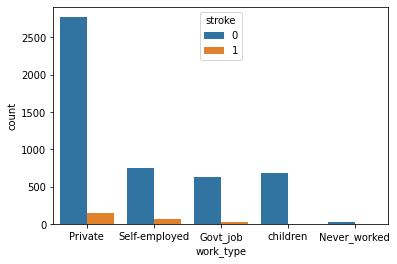

In [332]:
sns.countplot(x="work_type", hue= df['stroke'], data=df)

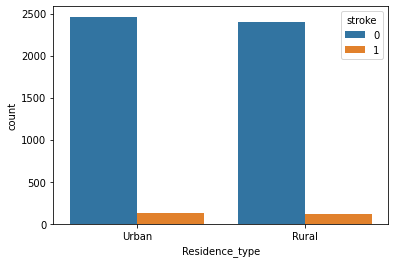

In [333]:
sns.countplot(x="Residence_type", hue= df['stroke'], data=df)

There is no much difference in people who may receive or not receive depending on their residence type that is Rural or Urban.

#Data Preprocessing

In [334]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [335]:
categorical_variable= df.select_dtypes(include=['object']).columns.tolist()

In [336]:
categorical_variable

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [337]:
print("Gender", df['gender'].unique())
print("Ever_married",df['ever_married'].unique())
print("worktype",df['work_type'].unique())
print("residence_type", df['Residence_type'].unique())
print("smaokingstatus", df['smoking_status'].unique())

Gender ['Male' 'Female' 'Other']
Ever_married ['Yes' 'No']
worktype ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
residence_type ['Urban' 'Rural']
smaokingstatus ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


###The conversion of categorical data into numerical data is called Categorical Encoding.

Label Encoding

In [338]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])


In [339]:
#So label encoding is done

In [340]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


Standard scalar

In [341]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df=df.drop(columns=columns,axis=1)

In [342]:
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.706375,1.066746,1.051434
1,2.121559,0.013363,0.786070
2,-0.005028,0.506346,1.626390
3,1.437358,0.766044,0.255342
4,1.501184,-0.655458,1.582163


In [343]:
#Now add scaled to df

In [349]:
df = pd.concat([df, stand_scaled], axis=1)
df.head(5)

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,9046,1,0,1,1,2,1,1,1,2.706375,1.066746,1.051434
1,51676,0,0,0,1,3,0,2,1,2.121559,0.013363,0.786070
2,31112,1,0,1,1,2,0,2,1,-0.005028,0.506346,1.626390
3,60182,0,0,0,1,2,1,3,1,1.437358,0.766044,0.255342
4,1665,0,1,0,1,3,0,2,1,1.501184,-0.655458,1.582163


In [345]:
#lets drop id

In [350]:
df=df.drop(columns='id',axis=1)

#Modelling

In [347]:
from sklearn.model_selection import train_test_split

In [352]:
X=df.drop(['stroke'], axis=1)
y=df['stroke']

In [353]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 0)

Decision Tree

In [369]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 124)

model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [371]:
prediction = model.predict(X_test)

In [372]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, prediction))


[[1392   72]
 [  65    4]]


In [373]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1464
           1       0.05      0.06      0.06        69

    accuracy                           0.91      1533
   macro avg       0.50      0.50      0.50      1533
weighted avg       0.91      0.91      0.91      1533



In [374]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9106327462491846

logistic regression

In [363]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [364]:
y_pred_loj = loj_model.predict(X_test)

In [365]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [366]:
accuracy_score(y_test, y_pred_loj)

0.954337899543379

In [367]:
print("Training Accuracy :", loj_model.score(X_train, y_train))
print("Testing Accuracy :", loj_model.score(X_test, y_test))

Training Accuracy : 0.9496785015376014
Testing Accuracy : 0.954337899543379


In [376]:
print(classification_report(y_test, y_pred_loj))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



XG Boost

In [377]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit(X_train, y_train)

In [378]:
y_pred_xgb_model = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb_model)

0.954337899543379

In [379]:
print(classification_report(y_test, y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [380]:
print (confusion_matrix(y_test, y_pred_xgb_model))

[[1463    1]
 [  69    0]]


In [381]:
from xgboost import XGBClassifier
# Model Tuning
XGB_model = XGBClassifier(random_state = 42, max_depth = 8, n_estimators = 3000, 
                          reg_lambda = 1.2, reg_alpha = 1.2, 
                          min_child_weight = 1,objective = 'binary:logistic',
                         learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5,
                          eval_metric = 'auc').fit(X_train, y_train)

In [382]:
y_pred_XGB_model = XGB_model.predict(X_test)
accuracy_score(y_test, y_pred_XGB_model)

0.9478147423352903

In [383]:
print(classification_report(y_test, y_pred_XGB_model))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1464
           1       0.13      0.03      0.05        69

    accuracy                           0.95      1533
   macro avg       0.54      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533



In [384]:
models = [
    model,
    xgb_model,
    loj_model,
      
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
DecisionTreeClassifier:
Accuracy: 91.0633%
----------------------------
XGBClassifier:
Accuracy: 95.4338%
----------------------------
LogisticRegression:
Accuracy: 95.4338%
